<a href="https://colab.research.google.com/github/BrajeshSonar/NUmber-plate-detection/blob/main/number_plate_detection_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (21.4 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"


In [ ]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


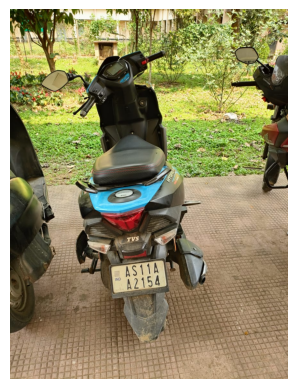

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

# Load the image
image_path = "scooty.jpg"  # Change this to your uploaded image filename
image = cv2.imread(image_path)

# Convert BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

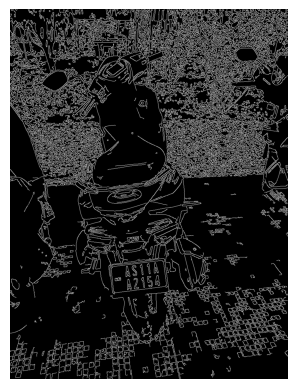

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Show the edges
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

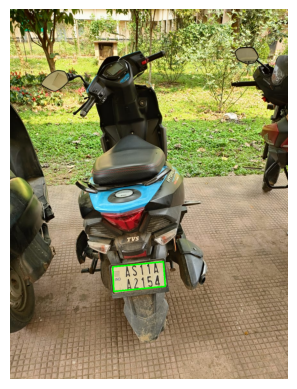

In [ ]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

license_plate = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Check if contour has 4 sides (rectangle)
        license_plate = approx
        break

# Draw the detected license plate
if license_plate is not None:
    cv2.drawContours(image, [license_plate], -1, (0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


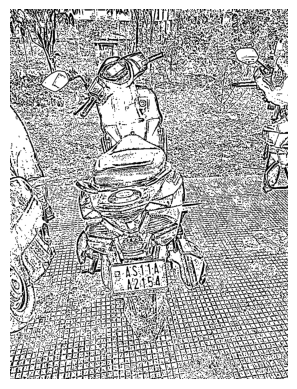

Detected License Plate Number: TABECOLUD PPEPS2T
ANTPON8AINLLARR
PPINTROREERTUONGV5 H H P RRS BS
ARRSUMCUPALIELR DN
SCNNHYT SGN
SASNRPSGU SSSAA
RA BS PANUBAUSER NYAS
SROEENGWCETRC A
RGEGMASLS SES BH
BERMMMOR CPRETASSBPAH38
ARNYAN OPRAUMGESSTS AEAAS2TEW
NS VE SS B RRSSEANDSETARNETA
RETR SAORENCOINA RIE
SN COWENQSON
SNE A HGSB
ANESEM
SSUAEN WA7
OY
ARESA MP L
EN S L PS
SS W ESEST SN
SPW22VF ST SCSSNR
FEFEEESESPEENRENF LE SN SS
DAVEE ABREI SAW ES
YULANLSSTSA8 S BENERSETAR SRCECN
AWN FASAAI BELG
OEENOAOMERNASS
NCE TRENTO
SASRPE3GS SSR
SOAFV A CO SS RERSRS
EE P E P CVARAEEG SS
PBELEESSMCE SE STEN
CEMEEEL PEN RN P CNS
PMPTSSFTSUEASLAA4VSA E
PERTT SYSECSATOCCRACSON
SSEPEEE SOLATPGNRS
TPE EE SSEEECE ED SS WARREL
ELLER SE AGB


In [ ]:
# Apply adaptive thresholding for better contrast
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply morphological operations to enhance text
kernel = np.ones((2, 2), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=1)
thresh = cv2.erode(thresh, kernel, iterations=1)

# Display the processed image
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

# Perform OCR with improved configuration
text = pytesseract.image_to_string(thresh, config='--psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

print("Detected License Plate Number:", text.strip())